# Mark Recapture

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Lincoln-Peterson estimator:

${\displaystyle {\hat {N}}={\frac {Kn}{k}}}$

Chapman estimator (use this one):

${\displaystyle {\hat {N}}_{C}={\frac {(K+1)(n+1)}{k+1}}-1}$

<IPython.core.display.Javascript object>


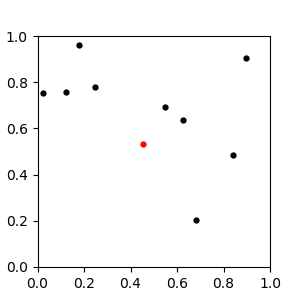

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 3. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 3. 3. 3. 3. 3. 3. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 3. 3. 3. 3. 3. 3. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 3. 5. 5. 3. 3.
 3. 3. 5. 5. 5. 5. 5. 3. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


<IPython.core.display.Javascript object>


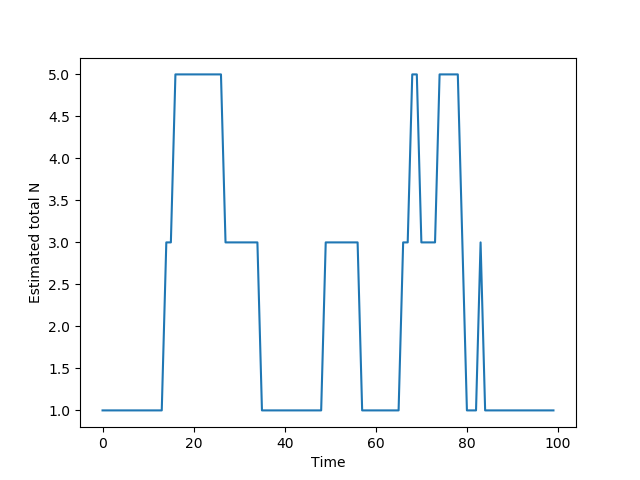

In [3]:
%matplotlib notebook

n = 10
nsteps = 100
vmin = 0.01 # these are the limits for the random distribution of vx and vy
vmax = 0.05

x = np.random.uniform(size=n, low=0, high=1) # Make the starting points random
y = np.random.uniform(size=n, low=0, high=1)

# Numerical integration for speed:
vx = np.random.uniform(size=n, low=vmin, high=vmax)*(2*np.random.randint(size=n, low=0, high=2)-1)
vy = np.random.uniform(size=n, low=vmin, high=vmax)*(2*np.random.randint(size=n, low=0, high=2)-1)

# Capture/Mark:
trapsize = 0.3
color = np.where(np.logical_and(x<trapsize, y<trapsize), 1, 0) # "Mark" by coloring animals that originate
#in the trap, 1 for trapped/marked, 0 for free
n_marked = np.sum(color) # Create variable to keep track of marked animals
estimation = np.zeros(nsteps) # Create an empty array to track estimation of the total population that an
#ecologist might make

fig = plt.figure(figsize=(3,3)); # Create a figure, outside the for loop, to plot this estimation

for t in range(nsteps): # For t, a counter, in 50 iterations (the value of nsteps):
    x += vx # The new vector of x coordinates = old vector + speed value
    y += vy # The new vector of y coordinates = old vector + speed value

    # Create boundaries that reflect animals:
    vx = np.where(np.logical_or(x>1, x<0), -vx, vx) # Reverse the speed when x is greater than 1 or less than 0,
    #otherwise leave it the same
    vy = np.where(np.logical_or(y>1, y<0), -vy, vy)
    
    # Recapture:
    n_recap_marked = np.sum(np.logical_and(x<trapsize, y<trapsize)*color) # Create variable that meets 3
    #conditions: x is in the trap, y is in the trap, and they are colored
    n_recap_total = np.sum(np.logical_and(x<trapsize, y<trapsize)) # Create variable for all within the trap
    estimation[t] = (n_marked + 1)/(n_recap_marked + 1)*(n_recap_total + 1)-1 # Fill the array for estimation
    #using the Chapman estimator equation

    # Figures:
    plt.cla() # Clear the current axes
    plt.plot(x[color==0],y[color==0], 'k.', markersize=7); # Plot the non-marked individuals in black
    plt.plot(x[color==1], y[color==1], 'r.',markersize=7) # Plot the marked individuals in red
    plt.xlim(0,1); # Axis limits
    plt.ylim(0,1);
    fig.canvas.draw() # Command to make the points animate
    
print(estimation)

plt.figure() # Specify a new figure
plt.plot(estimation); # Plot estimation
plt.xlabel('Time'); # Axis labels
plt.ylabel('Estimated total N');
